In [ ]:
# Observed Trends:

# 1. There are almost equal number of cities above or below equator that has high temperatures. 
# 2. Humidity level is high in most of the cities with high latitude.
# 3. Cities above the equator line have more clouds.
# 4. More cities above equator experience windy conditions.


In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import random
import seaborn as sns

import time
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [46]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

## Perform API Calls

In [47]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=badulla"

In [48]:
# Starting URL for Weather Map API Call

# set up lists to hold reponse info
city_id = []
city_name = []
cloudiness = []
country = []
dt = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city.replace(' ', '%20' )
    print(url)
    response = requests.get(url).json()
    if 'id' in response:
        city_id.append(response['id'])
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=kerman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=bethe

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=port%20macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=deogarh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=abu%20samrah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=skjervoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=peru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=richmond
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a8

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=billings
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=carahue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=progreso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=baraboo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=dubenskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=butajira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=pampa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=ryabovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=espera

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=green%20river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=ngukurr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=la%20romana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=nantucket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=shitanjing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=lengshuijiang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead5

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=twentynine%20palms
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=camargo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=indramayu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=anahuac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=krasnoselkup
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=zhemtala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=kamenskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=alta%20floresta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc7

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=ayan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=tocopilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=newcastle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=kushiro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=tezu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=kidal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=verkhoyans

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=yinchuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=ketchikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=nelson%20bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=aksu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=praia%20da%20vitoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cea

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=grand%20centre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=aquiraz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=manta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=mongo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=fayaoue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=bettiah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=zheleznodorozhnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=abadan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=balkanabat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=palora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=high%20prairie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=severobaykalsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=erenhot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=yar-sale


In [49]:

data_list = list(zip(city_name, cloudiness, country, dt, humidity, lat, lon, max_temp, wind_speed))
weather_data = pd.DataFrame(data_list, columns=["City Name",
                                      "Cloudiness",
                                      "Country",
                                      "Date",
                                      "Humidity",
                                      "Lat",
                                      "Lng",
                                      "Max Temp",
                                      "Wind Speed"])

weather_data.count()

City Name     544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [50]:
# Display the DataFrame
weather_data.head()

,City Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,0,AU,1531019577,100,-33.64,115.35,58.84,13.69
1,Kodiak,1,US,1531014780,60,39.95,-94.76,75.20,5.82
2,Kerman,0,IR,1531015200,12,30.29,57.06,64.40,2.62
3,Hermanus,0,ZA,1531019578,77,-34.42,19.24,37.69,2.51
4,Hithadhoo,56,MV,1531019578,100,-0.60,73.08,77.83,9.22


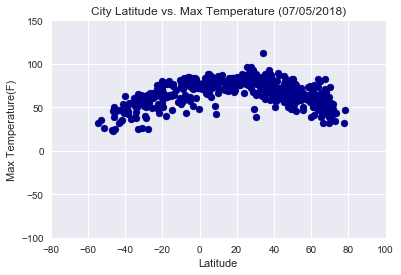

In [53]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], facecolor="darkblue", marker="o")

plt.ylim(-100,150)
plt.xlim(-80,100)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (07/05/2018)")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, 
        color_codes=False, rc=None)

# Save the figure
plt.savefig("latitude_vs_max_temp.png")

# Show plot
plt.show()

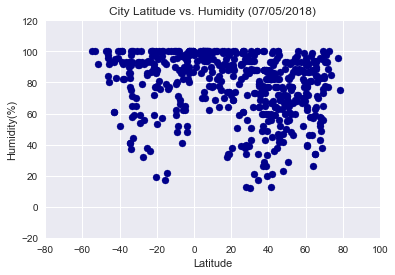

In [54]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], facecolor="darkblue", marker="o")

plt.ylim(-20,120)
plt.xlim(-80,100)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (07/05/2018)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, 
        color_codes=False, rc=None)

# Save the figure
plt.savefig("latitude_vs_humidity.png")

# Show plot
plt.show()

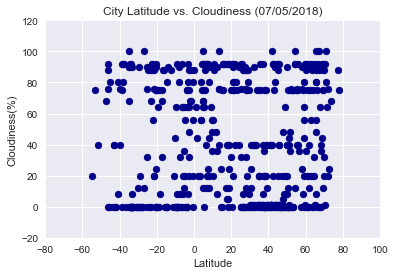

In [55]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], facecolor="darkblue", marker="o")

plt.ylim(-20,120)
plt.xlim(-80,100)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (07/05/2018)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, 
        color_codes=False, rc=None)

# Save the figure
plt.savefig("latitude_vs_Cloudiness.png")

# Show plot
plt.show()

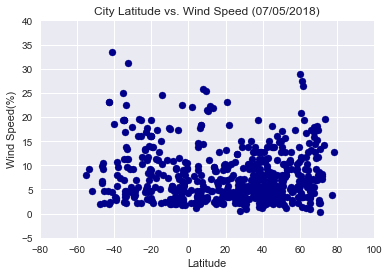

In [56]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], facecolor="darkblue", marker="o")

plt.ylim(-5,40)
plt.xlim(-80,100)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (07/05/2018)")
plt.ylabel("Wind Speed(%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, 
        color_codes=False, rc=None)

# Save the figure
plt.savefig("latitude_vs_Wind_Speed.png")

# Show plot
plt.show()